# Amazon India Sales Dataset

## 1. Data Loading and Initial Exploration:

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

In [247]:
df = pd.read_csv("Amazon Sale Report.csv")
df.head()

C:\Users\faisa\AppData\Local\Temp\ipykernel_21476\3949281228.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [248]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [250]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

2. ## Data Cleaning:

In [251]:
df = df.drop(columns = ['index','currency','ship-state','ship-postal-code','promotion-ids','Unnamed: 22','fulfilled-by','Style','ship-country'])
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,False


In [252]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [253]:
# replace statuses
df['Status'] = df['Status'].replace(
    ['Shipped - Delivered to Buyer', 'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Lost in Transit', 'Shipped - Out for Delivery','Pending - Waiting for Pick Up','Shipped - Damaged','Shipped - Picked Up'],
    ['Delivered', 'Returned', 'Rejected by Buyer', 'Lost in Transit', 'Shipped - ongoing','Pending','Damaged','Picked Up']
)
print("\nUnique values in the 'Status' column after replacement:")
print(df['Status'].unique())



Unique values in the 'Status' column after replacement:
['Cancelled' 'Delivered' 'Shipped' 'Returned' 'Rejected by Buyer'
 'Lost in Transit' 'Shipped - ongoing' 'Shipped - Returning to Seller'
 'Picked Up' 'Pending' 'Damaged' 'Shipping']


## 3. Exploratory Data Analysis & 4. Feature Engineering:

C:\Users\faisa\AppData\Local\Temp\ipykernel_21476\565317474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  cate_plot = sns.barplot(data=category_df, x='Total Amount', y='Category', palette='viridis')


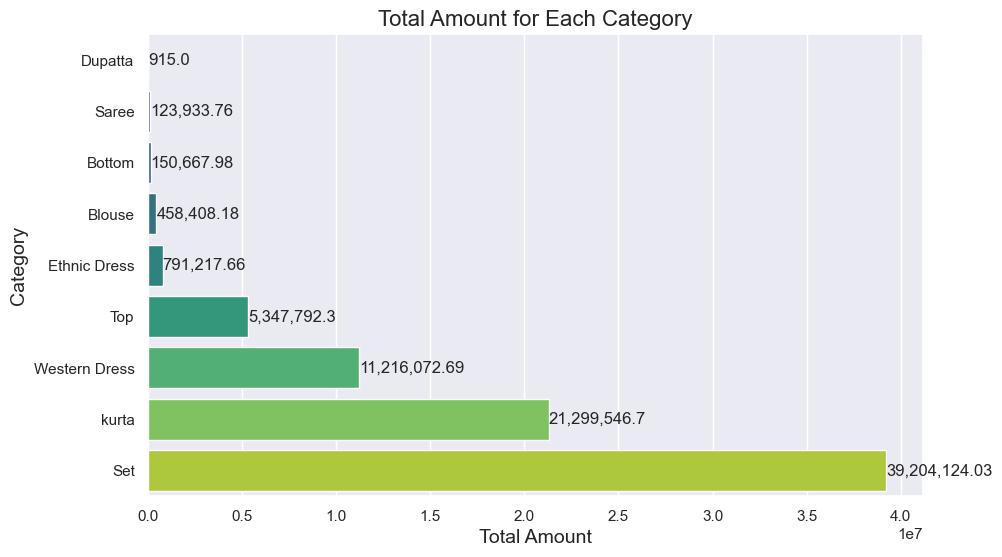

In [271]:
plt.figure(figsize=(10, 6))

cate_plot = sns.barplot(data=category_df, x='Total Amount', y='Category', palette='viridis')

for index, row in category_df.iterrows():
    cate_plot.text(row['Total Amount'], index, '{:,}'.format(row['Total Amount']), va='center')

plt.title('Total Amount for Each Category', fontsize=16)
plt.xlabel('Total Amount', fontsize=14)
plt.ylabel('Category', fontsize=14)

plt.show()


C:\Users\faisa\AppData\Local\Temp\ipykernel_21476\4068089588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_df.index, y=status_df.values, palette='magma')


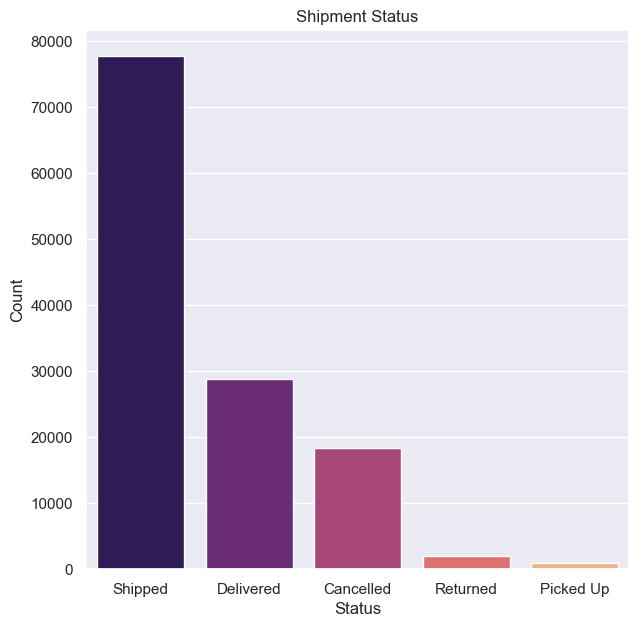

In [222]:
plt.figure(figsize=(7, 7))
sns.barplot(x=status_df.index, y=status_df.values, palette='magma')
plt.title('Shipment Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


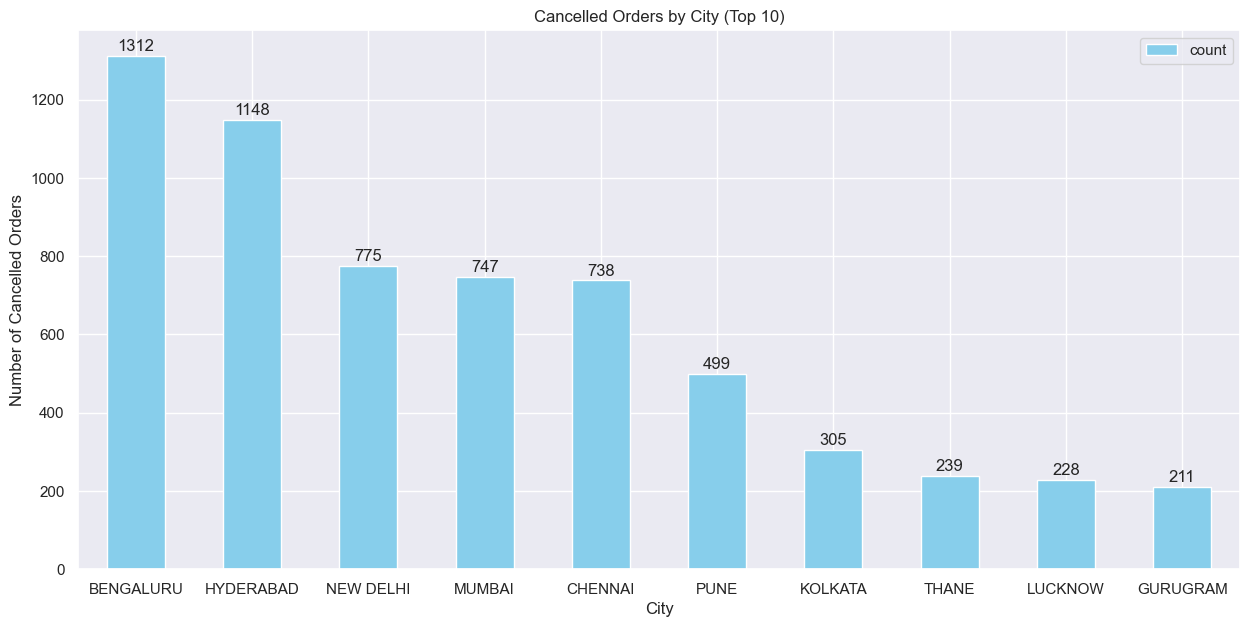

In [223]:
cancelled_top_cities = cancelled_by_city.head(10)

plt.figure(figsize=(15,7))
cancelled_top_cities.plot(kind='bar', color='skyblue')
plt.title('Cancelled Orders by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of Cancelled Orders')
plt.xticks(rotation=0)
plt.legend()

# Add data labels
for i, v in enumerate(cancelled_top_cities):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.show()


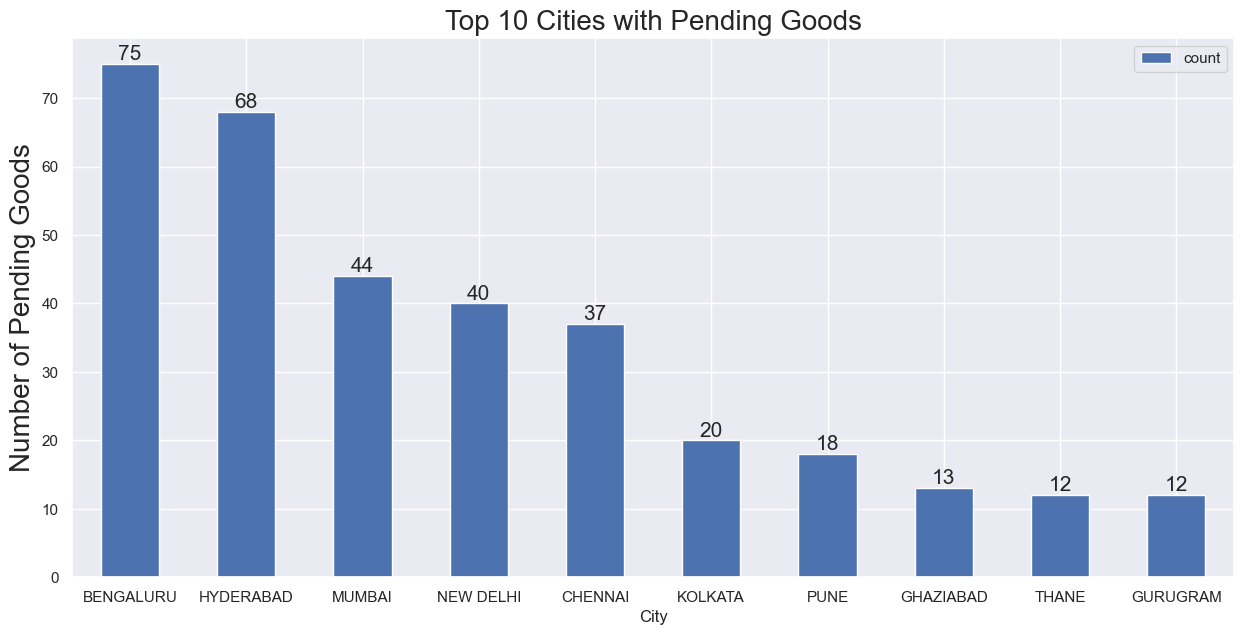

In [224]:
plt.figure(figsize=(15,7))
ax = pending_by_city.plot(kind='bar')
plt.title('Top 10 Cities with Pending Goods', fontsize=20)
plt.xlabel('City')
plt.ylabel('Number of Pending Goods', fontsize=20)
plt.legend()
plt.xticks(rotation=0)

# Add data labels
for i, v in enumerate(pending_by_city):
    ax.text(i, v + 0, str(v), ha='center', va='bottom', fontsize=15)
plt.show()


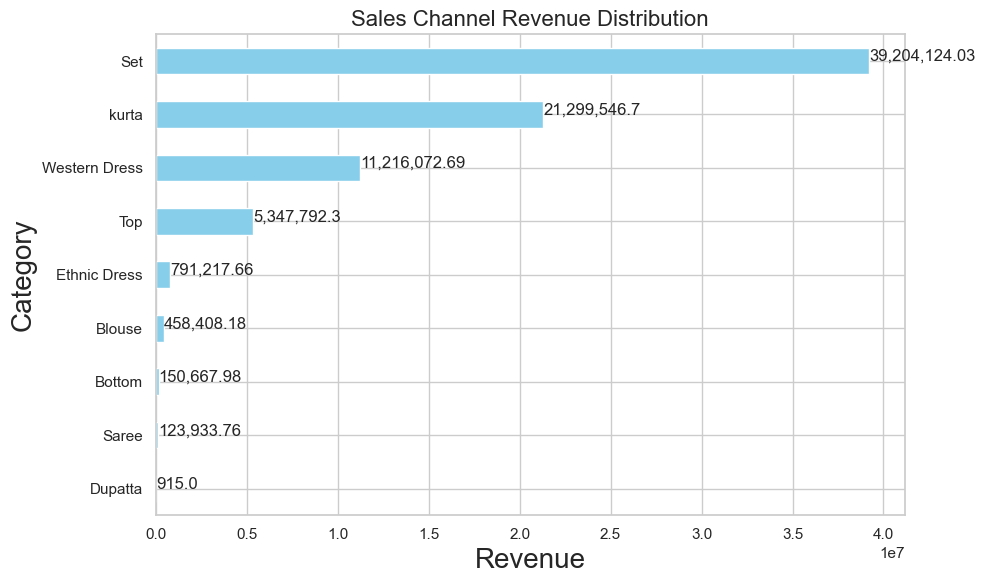

In [240]:
plt.figure(figsize=(10, 6))
ax = category_df.plot(kind='barh', color='skyblue')

# Add data labels
for i, v in enumerate(category_df):
    ax.text(v + 0, i, '{:,}'.format(v))

plt.title('Sales Channel Revenue Distribution', fontsize=16)
plt.xlabel('Revenue', fontsize=20)
plt.ylabel('Category', fontsize=20)
plt.tight_layout()
plt.show()



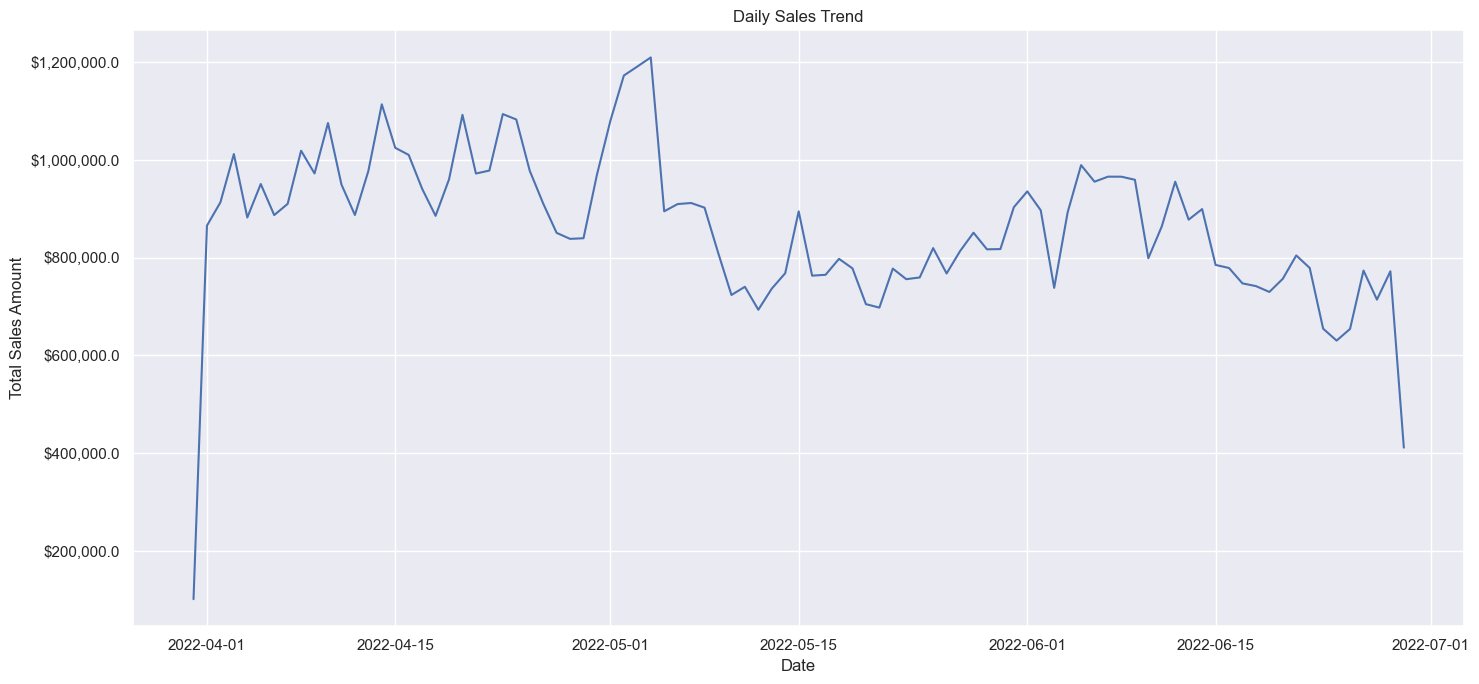

In [ ]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(15,7))
daily_sales.plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')

# a custom tick formatter to display amount in full instead of showing it like: "0.2 0.4" ( I got to admit this entire thing is from stackoverflow)
def currency_formatter(x, pos):
    return '${:,}'.format(x)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.tight_layout()
plt.show()


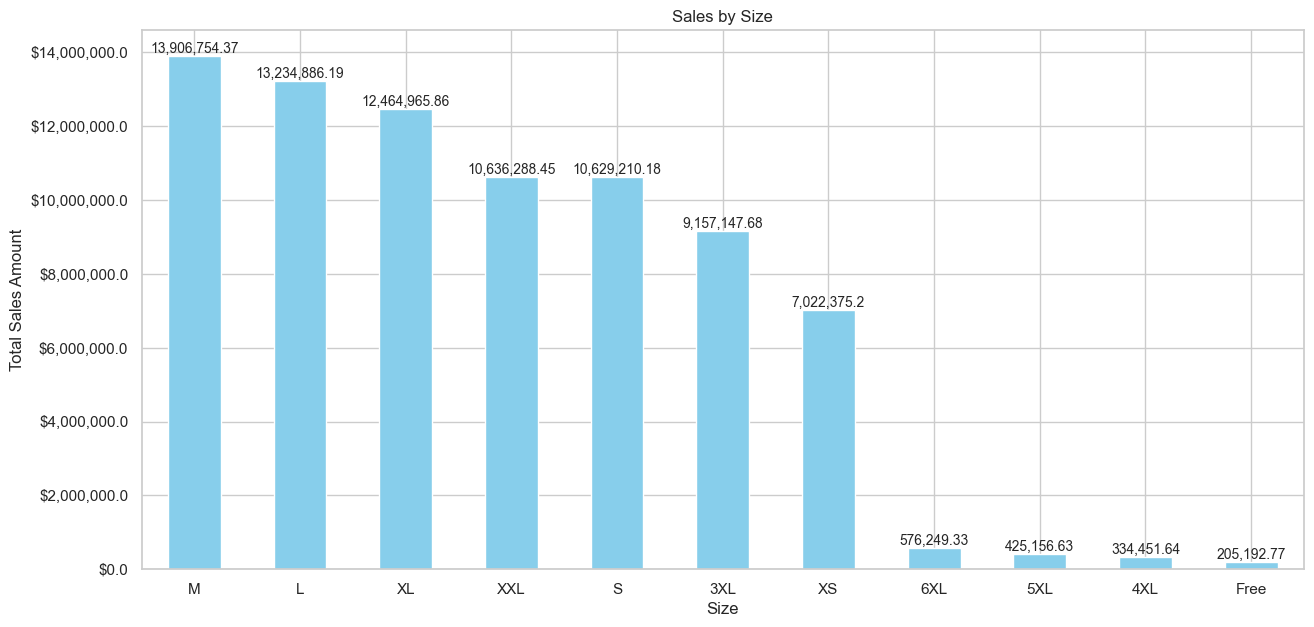

In [ ]:

for i, v in enumerate(sales_by_size):
    ax.text(v + 0, i, '{:,}'.format(v))

# Plotting
plt.figure(figsize=(15, 7))
sales_by_size.plot(kind='bar', color='skyblue')
plt.title('Sales by Size')
plt.xlabel('Size')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0) 
plt.gca().yaxis.set_major_formatter(currency_formatter) # to make the entire amount number show up(idk how it works its like this in stackoverflow)

for i, v in enumerate(sales_by_size):
    plt.text(i, v + 0, '{:,}'.format(v), ha='center', va='bottom', fontsize=10) # fontsize because the number is too big

plt.show()


<Figure size 1500x700 with 0 Axes>

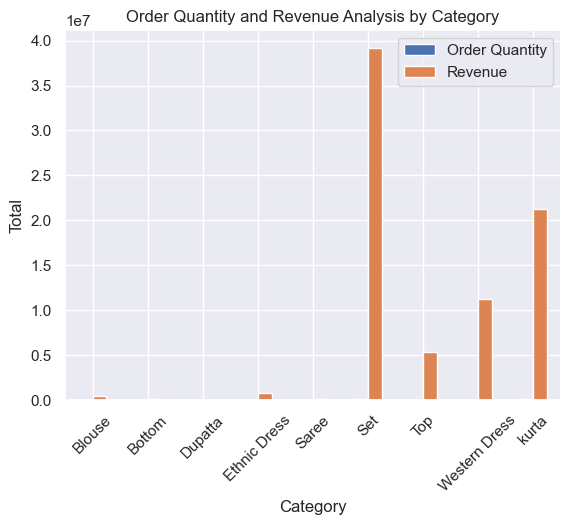

In [ ]:
category_analysis = df.groupby('Category').agg({'Qty': 'sum', 'Amount': 'sum'})

plt.figure(figsize=(15,7))
bars = category_analysis.plot(kind='bar')
plt.title('Order Quantity and Revenue Analysis by Category')
plt.xlabel('Category')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend(['Order Quantity', 'Revenue'])
plt.show()


C:\Users\faisa\AppData\Local\Temp\ipykernel_21476\3529260170.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_by_city.head(10), x='City', y='Total Orders', palette='rocket')


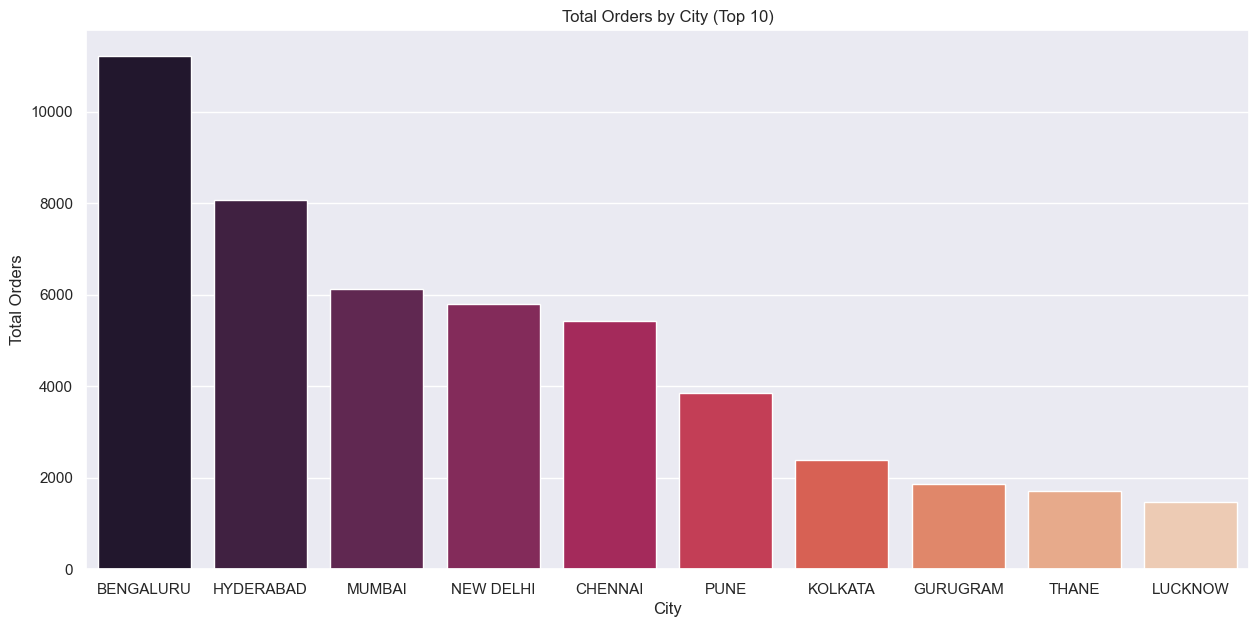

In [272]:
orders_by_city = df['ship-city'].value_counts().reset_index()
orders_by_city.columns = ['City', 'Total Orders']

plt.figure(figsize=(15,7))
sns.barplot(data=orders_by_city.head(10), x='City', y='Total Orders', palette='rocket')
plt.title('Total Orders by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.show()


C:\Users\faisa\AppData\Local\Temp\ipykernel_21476\287155928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=SKU.index, y=SKU.values, palette='cubehelix')


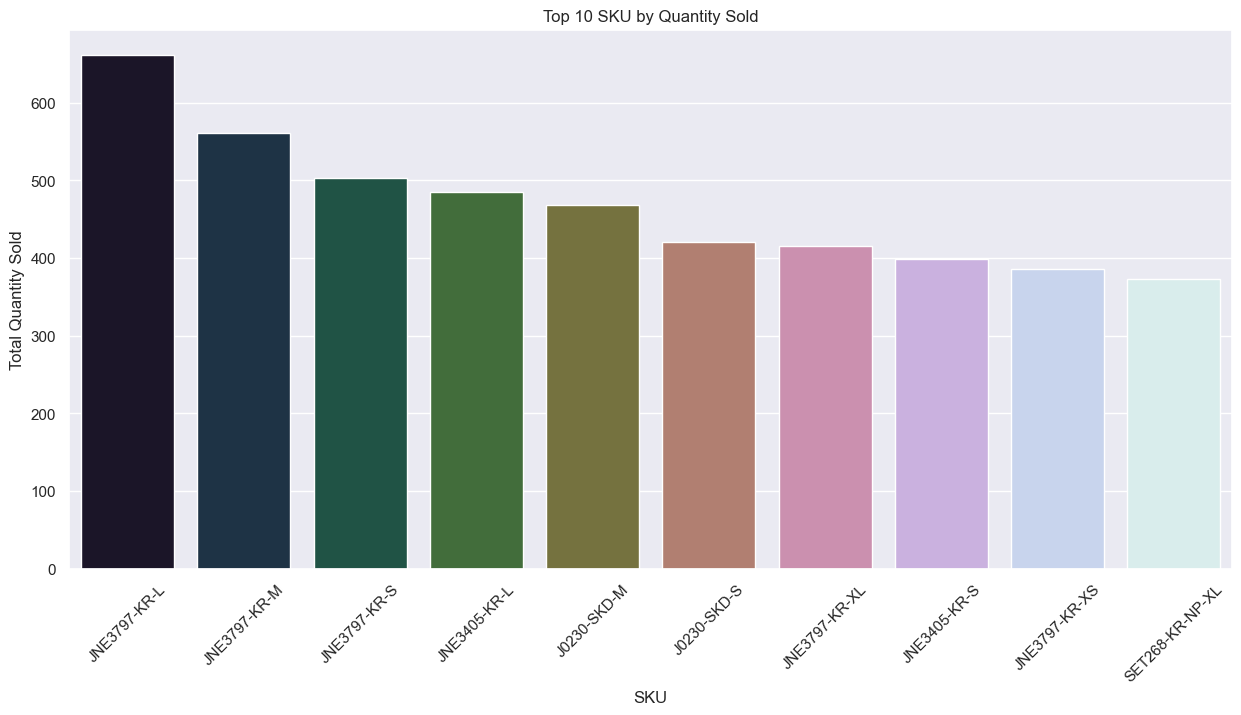

In [273]:
# 7. SKU-Level Analysis
SKU = df.groupby('SKU')['Qty'].sum().nlargest(10)
plt.figure(figsize=(15, 7))
sns.barplot(x=SKU.index, y=SKU.values, palette='cubehelix')
plt.title('Top 10 SKU by Quantity Sold')
plt.xlabel('SKU')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


## 6. Conclusion:

- there is a huge amount of 'Cancelled' orders in Bengaluru and Hyderabad.
- in categories, the "set" category has an astronomical difference in sales comparing to other category.
- the biggest peak and trough happened in May of 2022.
- there is an obvious correlation between cancelled orders and pending order by city.
ذ